In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [4]:
df.shape

(660, 15)

##### The dataset provides information about soccer players, their respective clubs, and various statistics related to their performance in matches. The column labeled "Goals" seems to indicate the number of goals scored by each player.

# Q1: What is the total number of goals scored in the entire dataset?




To find the total number of goals scored in the entire dataset, I will sum up the values in the "Goals" column.

In [5]:
total_goals = df["Goals"].sum()
total_goals

7795

#### The total number of goals scored in the entire dataset is 7795

# Q2: Which player has scored the most goals as a substitution

To determine which player has scored the most goals as a substitute, I'll focus on the Substitution and Goals columns.

In [65]:
# Filter the dataframe to only include players who have been substituted
subs_df = df[df['Substitution '] > 0]

# Sort by number of goals and get the top player
top_scorer_as_sub = subs_df.sort_values(by='Goals', ascending=False).head(1)

top_scorer_as_sub[['Player Names', 'Goals', 'Substitution ']]


,Player Names,Goals,Substitution
12,Lionel Messi,37,2


Lionel Messi has scored the most goals (37) when brought on as a substitute, even though he was substituted in only 2 times.

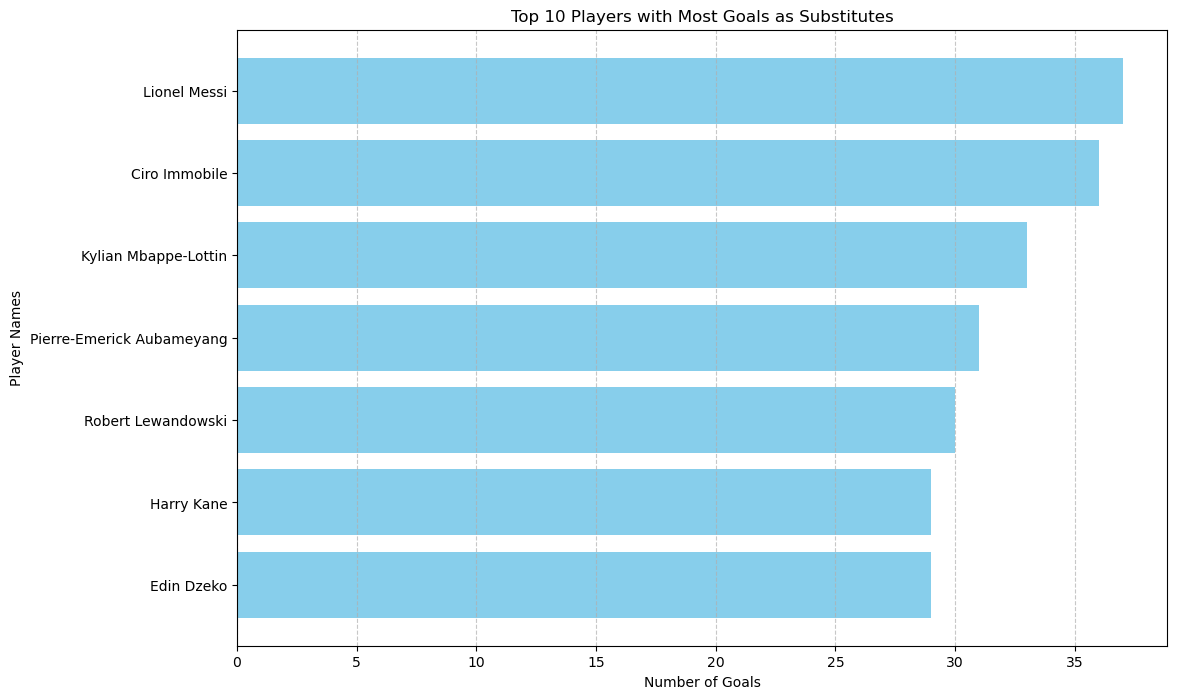

In [7]:
# Get top 10 players who scored the most as substitutes
top_10_subs = subs_df.sort_values(by='Goals', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_10_subs['Player Names'], top_10_subs['Goals'], color='skyblue')
plt.xlabel('Number of Goals')
plt.ylabel('Player Names')
plt.title('Top 10 Players with Most Goals as Substitutes')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



#### Here's a bar chart showing the top 10 players with the most goals as substitutes. Lionel Messi leads the chart, followed by other players. 

# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [36]:
# Find the top 5 players with the most number of goals scored
top_5_scorers = df.sort_values(by='Goals', ascending=False).head(5)

# Calculate the total number of goals scored by the top 5 players
total_goals_top_5 = top_5_scorers['Goals'].sum()

top_5_scorers[['Player Names', 'Goals']], total_goals_top_5


(          Player Names  Goals
 5    Cristiano Ronaldo     42
 12        Lionel Messi     37
 391      Ciro Immobile     36
 195       Lionel Messi     36
 317        Carlos Vela     36,
 187)

#### The top 5 players with the most goals scored are:

* Cristiano Ronaldo with 42 goals

* Lionel Messi with 37 goals

* Ciro Immobile with 36 goals

* Lionel Messi with 36 goals (from a different year)

* Carlos Vela with 36 goals

Messi appears twice in different years

##### The total number of goals scored by these top 5 players is 187.

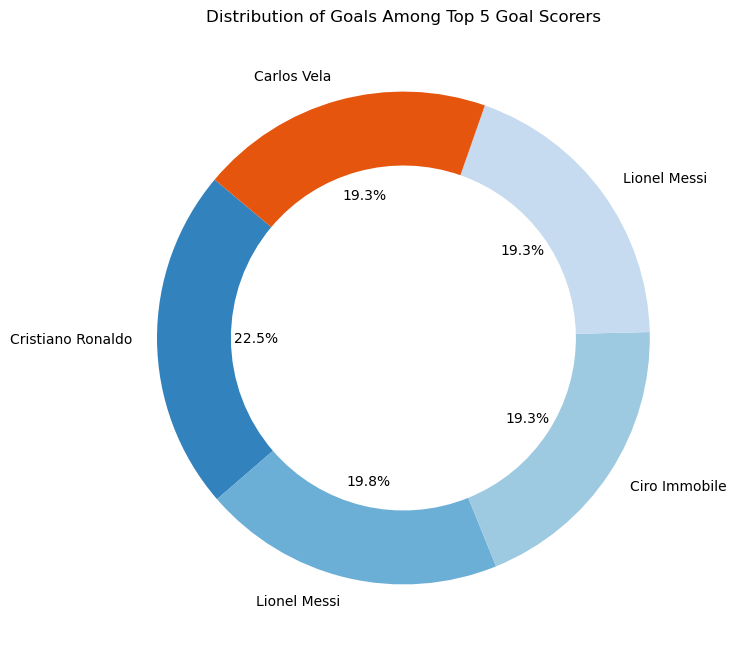

In [37]:
# Plotting the pie chart for distribution of goals among the top 5 goal scorers
plt.figure(figsize=(12, 8))
plt.pie(top_5_scorers['Goals'], labels=top_5_scorers['Player Names'], 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors, wedgeprops=dict(width=0.3))
plt.title('Distribution of Goals Among Top 5 Goal Scorers')
plt.show()


##### The pie chart visualizes the distribution of goals among the top 5 goal scorers. Each segment represents a player, and its size corresponds to the number of goals that player scored. The percentages on each segment provide a clear indication of the proportion of goals scored by each player relative to the total goals scored by the top 5 players.

# Q4: What are the top 10 countries with the most number of players in the dataset?

In [38]:
# Group the dataset by country and count the number of players for each country
countries_player_count = df.groupby('Country').size().sort_values(ascending=False).head(10)

countries_player_count


Country
Brazil          100
Germany         100
Italy           100
Spain           100
England          80
France           60
 Netherlands     40
Portugal         40
USA              40
dtype: int64

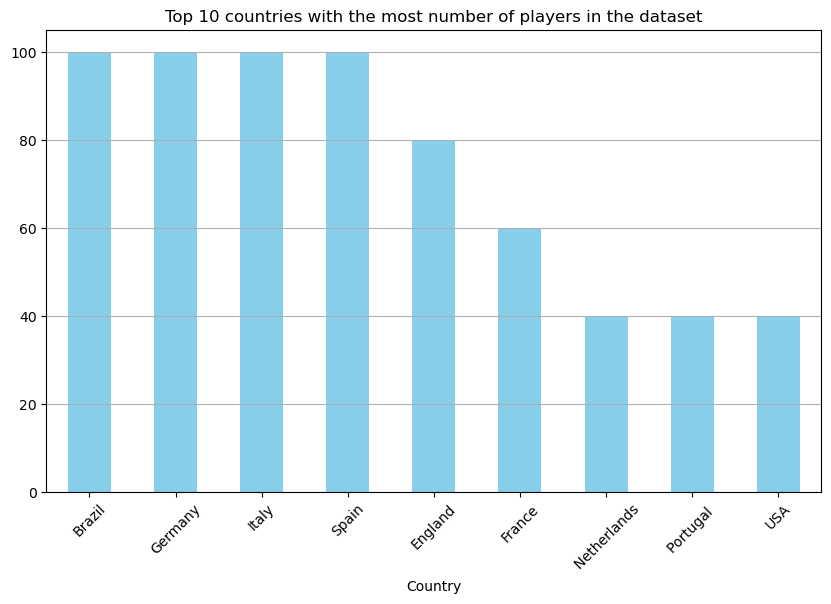

In [39]:
# Plotting the results
plt.figure(figsize=(10, 6))
countries_player_count.plot(kind='bar', color='skyblue')
plt.title("Top 10 countries with the most number of players in the dataset")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

#### The top 10 countries with the most number of players in the dataset are:

* Brazil with 100 players

* Germany with 100 players

* Italy with 100 players

* Spain with 100 players

* England with 80 players

* France with 60 players

* Netherlands with 40 players

* Portugal with 40 players

* USA with 40 players

# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [41]:
# Calculate the 1st and 99th percentile for the 'Mins' column
lower_quantile = df['Mins'].quantile(0.01)
upper_quantile = df['Mins'].quantile(0.99)

# Create a new dataframe after filtering out the outliers
filtered_df = df[(df['Mins'] >= lower_quantile) & (df['Mins'] <= upper_quantile)]

# Calculate the difference in the number of rows between the original and filtered dataframes
row_difference = df.shape[0] - filtered_df.shape[0]

row_difference


14

#### After removing the outliers from the "Mins" column (considering the upper quantile to be the 99th percentile and the lower quantile to be the 1st percentile), the difference in the number of rows is 14.

This means that 14 rows were identified as outliers and subsequently removed from the original dataset.

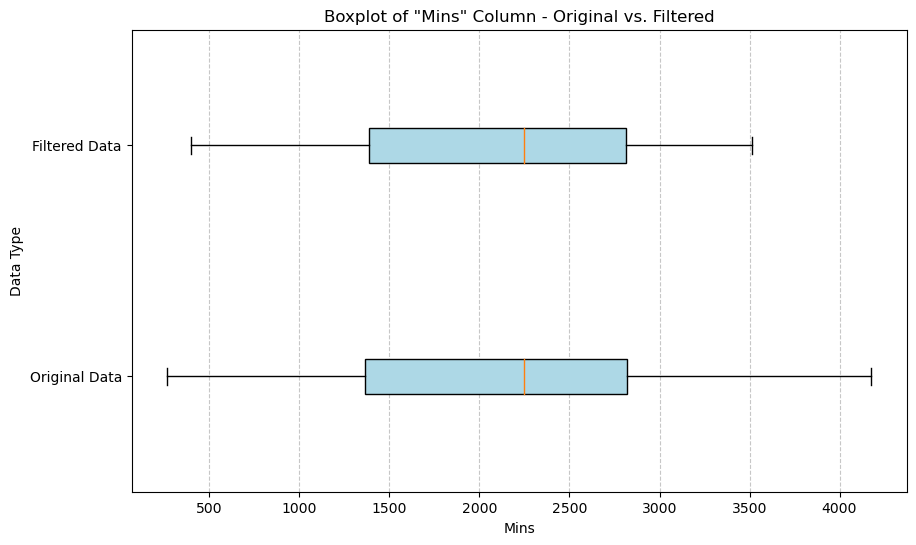

In [42]:
# Plotting the boxplot for the original 'Mins' data and the filtered 'Mins' data

plt.figure(figsize=(10, 6))
plt.boxplot([df['Mins'], filtered_df['Mins']], vert=False, patch_artist=True,
            labels=['Original Data', 'Filtered Data'], boxprops=dict(facecolor='lightblue'))

plt.title('Boxplot of "Mins" Column - Original vs. Filtered')
plt.xlabel('Mins')
plt.ylabel('Data Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#### The boxplot provides a clear comparison of the "Mins" column between the original data and the filtered data:

* The Original Data boxplot displays a wider spread with potential outliers, as indicated by the points outside of the whiskers.

* The Filtered Data boxplot, on the other hand, has a more compact spread, reflecting the removal of outliers.

# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [43]:
# Group the dataset by Player Names and sum the number of Goals
players_total_goals = df.groupby('Player Names')['Goals'].sum()

# Display top 5 players have scored the maximum number of goals
top_5_players_all_years = players_total_goals.sort_values(ascending=False).head(5)

top_5_players_all_years


Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64

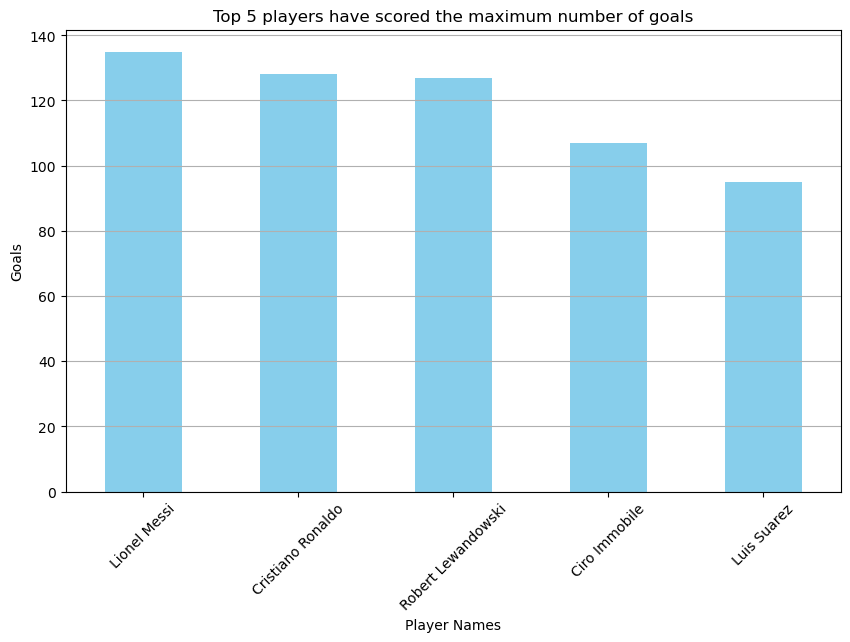

In [44]:
# Plotting the results
plt.figure(figsize=(10, 6))
top_5_players_all_years.plot(kind='bar', color='skyblue')
plt.title("Top 5 players have scored the maximum number of goals")
plt.xlabel("Player Names")
plt.ylabel("Goals")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

#### The top 5 players who have scored the maximum number of goals throughout all the years are:

* Lionel Messi with 135 goals

* Cristiano Ronaldo with 128 goals

* Robert Lewandowski with 127 goals

* Ciro Immobile with 107 goals

* Luis Suarez with 95 goals

##### These totals are in descending order based on the number of goals scored.

# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

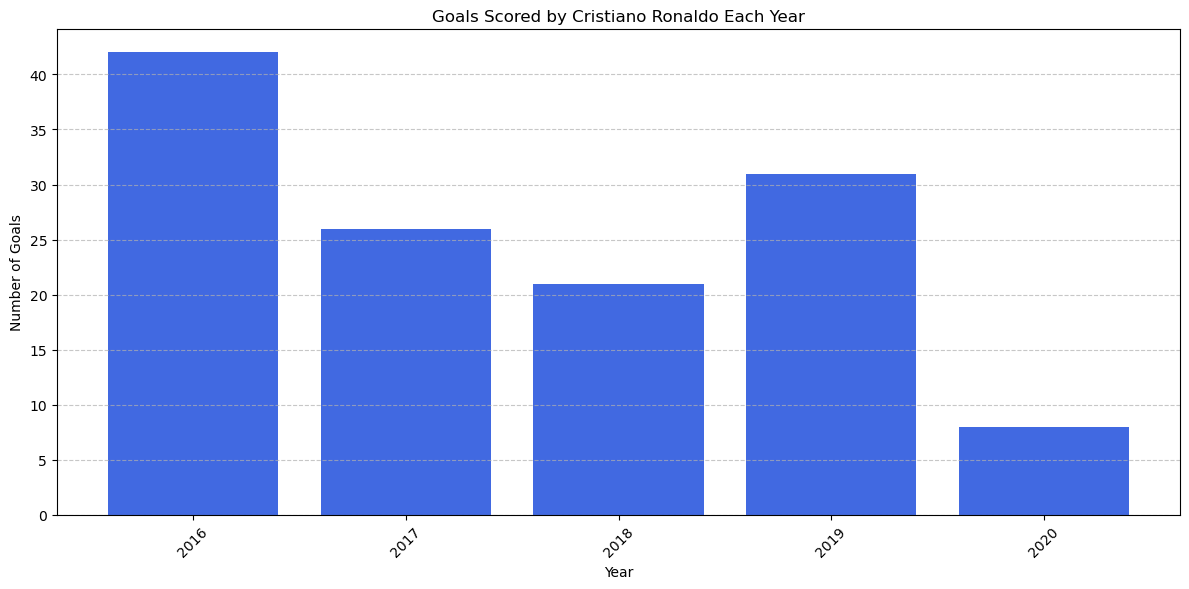

In [45]:
# Filter the data to only include rows corresponding to Cristiano Ronaldo
ronaldo_data = df[df['Player Names'] == 'Cristiano Ronaldo']

# Plot the number of goals scored by Cristiano Ronaldo each year
plt.figure(figsize=(12, 6))
plt.bar(ronaldo_data['Year'], ronaldo_data['Goals'], color='royalblue')
plt.title('Goals Scored by Cristiano Ronaldo Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ronaldo_data['Year'], rotation=45)
plt.tight_layout()

plt.show()


#### The bar plot shows the number of goals scored by Cristiano Ronaldo each year. From the plot, we can observe that Cristiano Ronaldo scored the most number of goals in the year 2016.

##### Now. I can plot a line chart comparing the cumulative goals over the years for the top 5 goal scorers in the dataset.This will give us a sense of how their goal-scoring performances have evolved over time.

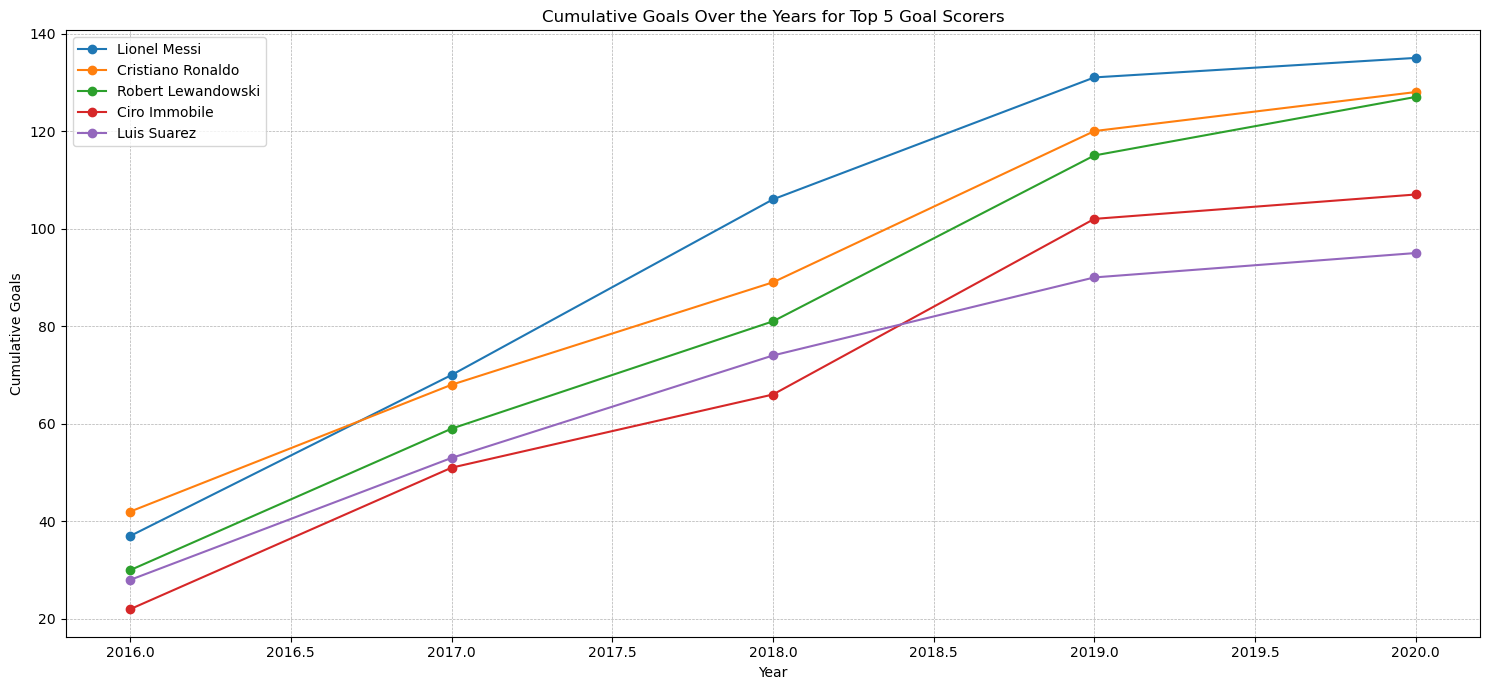

In [46]:
# List of top 5 goal scorers based on our previous analysis
top_5_players_list = top_5_players_all_years.index.tolist()

# Filter the dataset to only include rows corresponding to these top 5 players
top_5_players_data = df[df['Player Names'].isin(top_5_players_list)]

# Pivot the data to have years as columns, players as index, and goals as values
pivot_data = top_5_players_data.pivot_table(index='Player Names', columns='Year', values='Goals', aggfunc='sum').fillna(0)

# Calculate the cumulative sum across the years for each player
cumulative_goals = pivot_data.cumsum(axis=1)

# Plot the cumulative goals for top 5 players over the years
plt.figure(figsize=(15, 7))
for player in top_5_players_list:
    plt.plot(cumulative_goals.columns, cumulative_goals.loc[player], marker='o', label=player)

plt.title('Cumulative Goals Over the Years for Top 5 Goal Scorers')
plt.xlabel('Year')
plt.ylabel('Cumulative Goals')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


#### The line chart shows the cumulative goals scored over the years by the top 5 goal scorers. 

#### From the plot:
* Lionel Messi and Cristiano Ronaldo have a close race in terms of cumulative goals, with Messi leading slightly.

* Robert Lewandowski shows a consistent upward trend, closely following Ronaldo.

* Ciro Immobile and Luis Suarez also exhibit steady increases in their cumulative goals over the years.

This visualization provides a clear perspective on how these top players have evolved in their goal-scoring prowess over time.

# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

To determine who scored more goals in 2019 between Ronaldo and Messi, I will:

1. Filter the data for the year 2019.
2. Extract the rows corresponding to Ronaldo and Messi.
3. Compare their goal counts.
4. Plot the results using a bar plot.

In [47]:
# Filter the data for the year 2019 and players Ronaldo and Messi
ronaldo_messi_2019 = df[(df['Year'] == 2019) & 
                          ((df['Player Names'] == 'Cristiano Ronaldo') | 
                           (df['Player Names'] == 'Lionel Messi'))]

# Extract their goal counts
goals_2019 = ronaldo_messi_2019[['Player Names', 'Goals']]

goals_2019



,Player Names,Goals
333,Lionel Messi,25
385,Cristiano Ronaldo,31


#### In the year 2019:

* Cristiano Ronaldo scored 31 goals.

* Lionel Messi scored 25 goals.

##### Thus, Ronaldo had more goals than Messi in 2019.

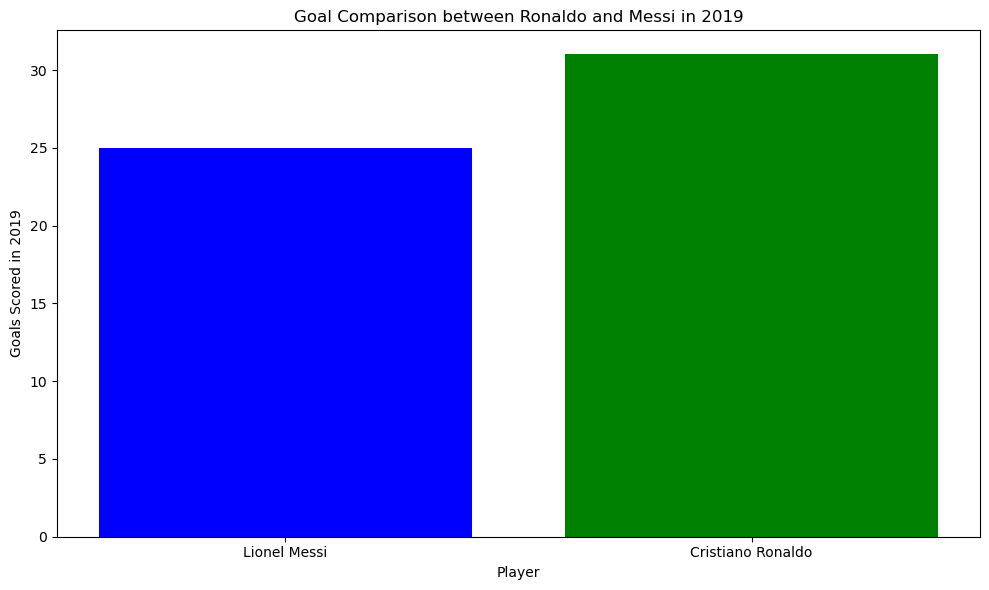

In [48]:
# Bar plot for the goal comparison
plt.figure(figsize=(10,6))
plt.bar(goals_2019['Player Names'], goals_2019['Goals'], color=['blue', 'green'])
plt.xlabel('Player')
plt.ylabel('Goals Scored in 2019')
plt.title('Goal Comparison between Ronaldo and Messi in 2019')
plt.tight_layout()
plt.show()


#### The bar plot visualizes the goal comparison between Lionel Messi and Cristiano Ronaldo in 2019.Cristiano Ronaldo scored more goals than Lionel Messi in that year.

# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

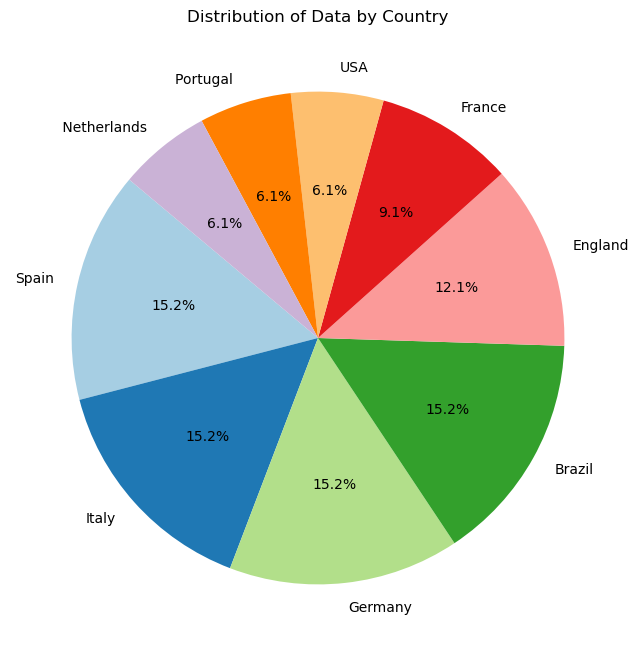

In [49]:
# Calculate the count of data for each country
country_counts = df['Country'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Data by Country')
plt.show()


##### Here's a pie chart displaying the distribution of data by country in the dataset. Each segment represents the proportion of data for a specific country, and the percentages are labeled on each segment.

I can create a bar chart to display the number of players from each country in the dataset.

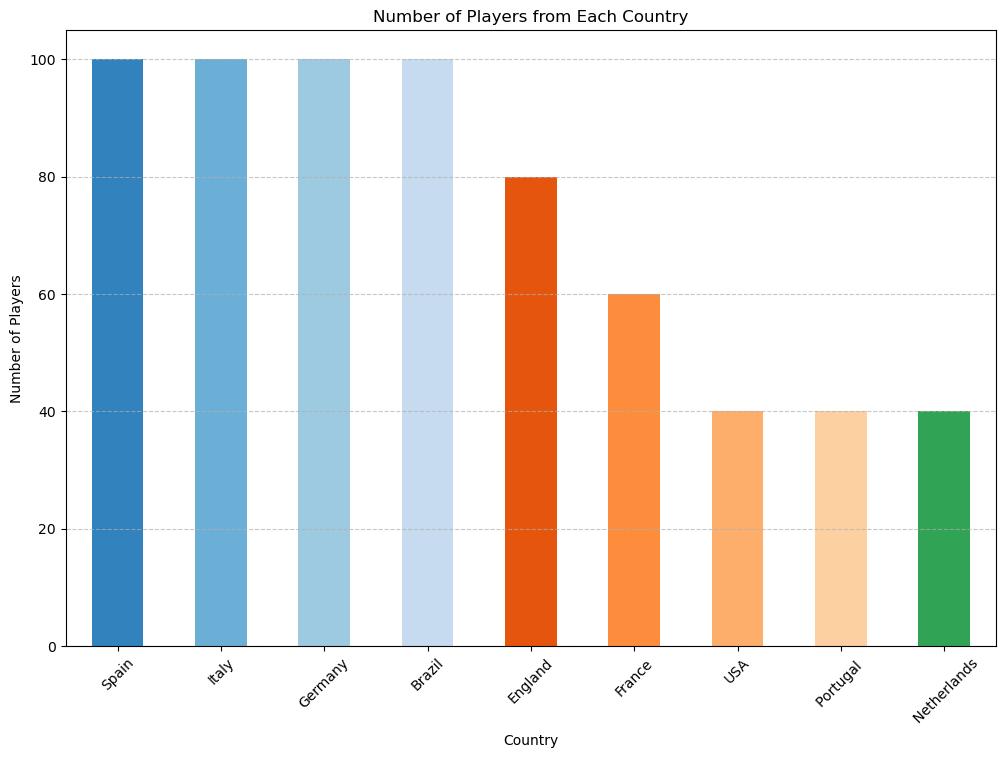

In [50]:
# Plotting the bar chart for number of players from each country
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color=plt.cm.tab20c.colors)
plt.title('Number of Players from Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#### The bar chart presents the number of players from each country in the dataset. The length of each bar represents the count of players from that particular country. 

# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

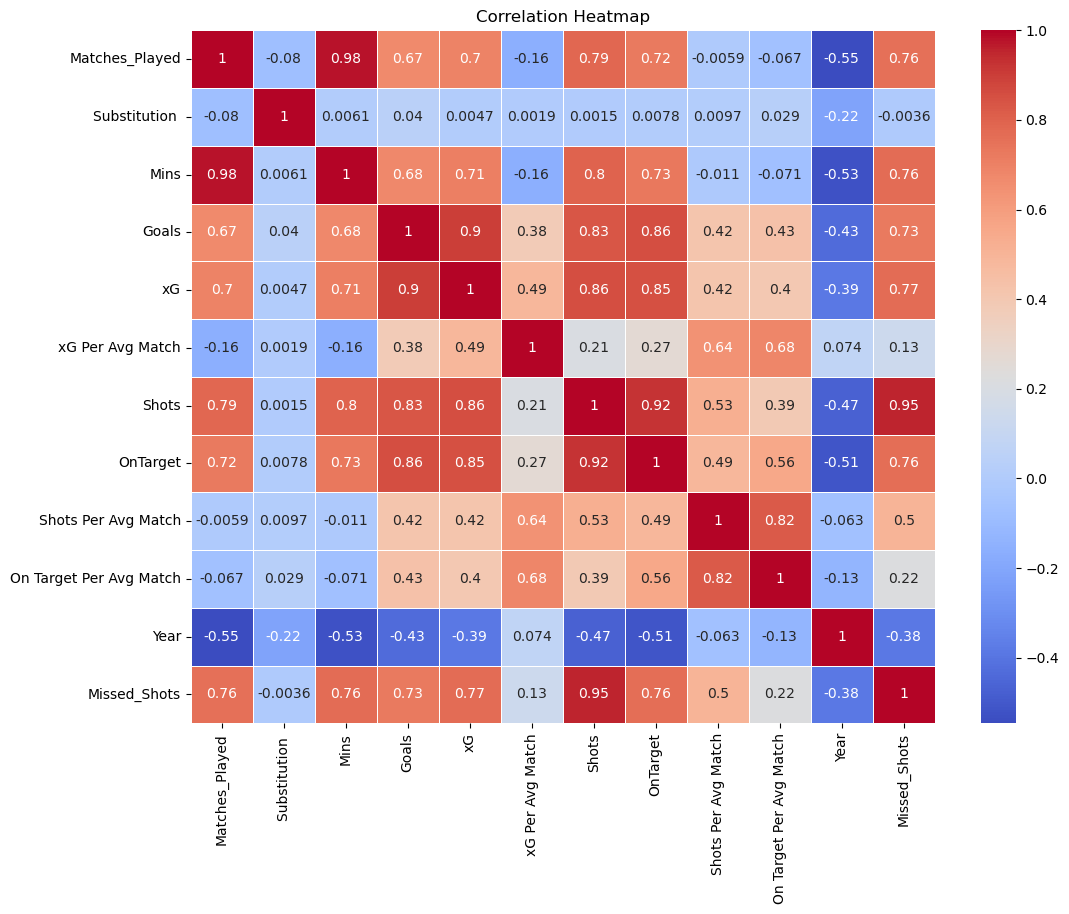

In [51]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#### Here's the heatmap displaying the correlation between the columns in the dataset. Each box represents the correlation coefficient between two columns, with the value of the correlation printed within the boxes. Warm colors (towards red) indicate a positive correlation, while cool colors (towards blue) indicate a negative correlation. The closer the value is to 1 or -1, the stronger the correlation.

# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

To determine the country with the maximum median "OnTarget" shots in 2020, I will:

1. Filter the data for the year 2020.
2. Group by the country and calculate the median for the "OnTarget" column for each country.
3. Find the country with the maximum median value.

In [53]:
# Filter the data for the year 2020
data_2020 = df[df['Year'] == 2020]

# Group by country and calculate the median for the "OnTarget" column
country_medians = data_2020.groupby('Country')['OnTarget'].median()

# Find the country with the maximum median value
max_median_country = country_medians.idxmax()
max_median_value = country_medians.max()

max_median_country, max_median_value


(' Netherlands', 25.5)

#### The Netherlands had the maximum median "OnTarget" shots among all the countries in the year 2020, with a median value of 25.5 shots.

Now, I will show the median "OnTarget" shots for each country in 2020 using a bar chart. This will give a clear comparison between countries.

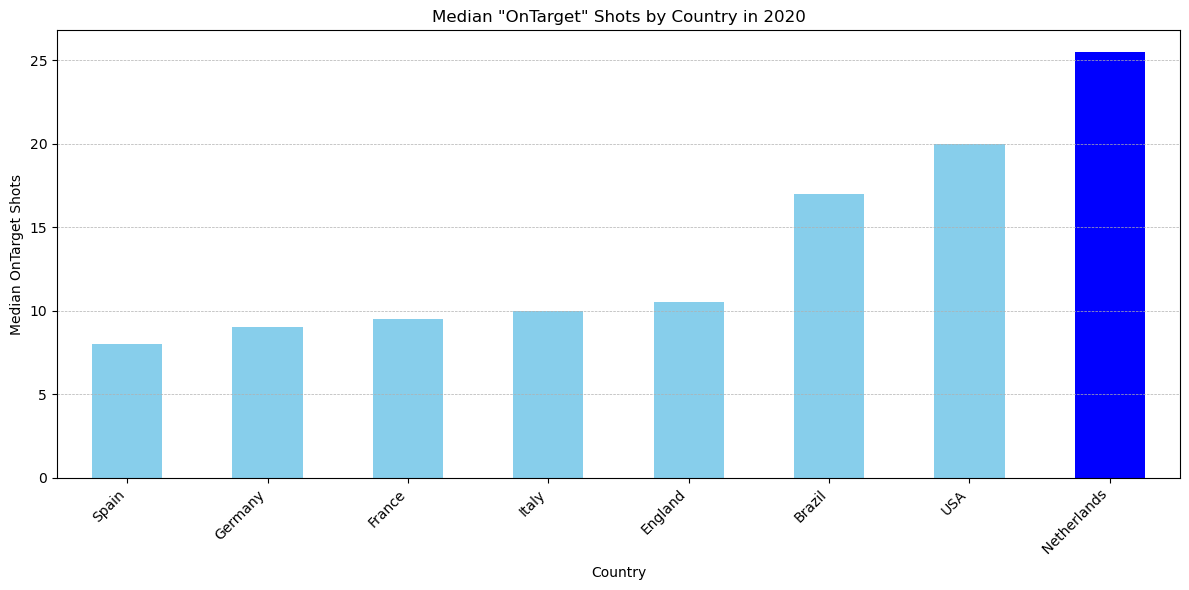

In [54]:
# Plotting again without the problematic annotation
plt.figure(figsize=(12, 6))
country_medians.sort_values().plot(kind='bar', color=['blue' if country == max_median_country else 'skyblue' for country in country_medians.sort_values().index])


plt.title('Median "OnTarget" Shots by Country in 2020')
plt.xlabel('Country')
plt.ylabel('Median OnTarget Shots')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha="right")



plt.tight_layout()
plt.show()


#### Here's the bar chart displaying the median "OnTarget" shots by country for the year 2020. The country with the maximum median, the Netherlands, is highlighted in blue with a dashed line indicating its median value.

##### I can create a horizontal line plot to visualize the median "OnTarget" shots for each country in 2020. 

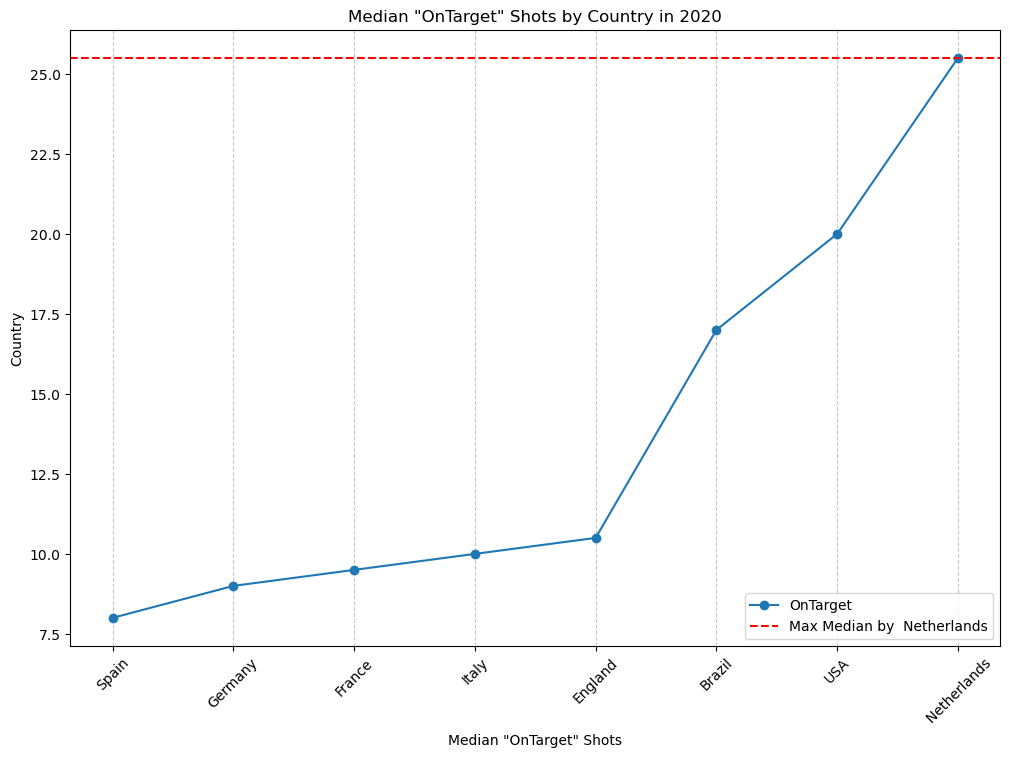

In [55]:
# Plotting the line plot for median 'OnTarget' shots for each country in 2020
plt.figure(figsize=(12, 8))
country_medians.sort_values().plot(kind='line', marker='o', linestyle='-')
plt.axhline(max_median_value, color='red', linestyle='--', label=f"Max Median by {max_median_country }")
plt.title('Median "OnTarget" Shots by Country in 2020')
plt.ylabel('Country')
plt.xlabel('Median "OnTarget" Shots')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


#### The line plot shows the median "OnTarget" shots for each country in 2020. The Netherlands, highlighted with a red dashed line, stands out as the country with the highest median value for shots on target. 

# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

#### To determine the player with the best average goals per minute:

1. I will first filter the dataset to only consider players who have played more than 30 games.

2. Calculate the goals per minute for each player.

3. Find the mean of the goals per minute for these players.

4. Sort the players based on this mean value to identify the player with the best average goals per minute.

In [56]:
# Filter players who have played more than 30 games
filtered_players = df[df['Matches_Played'] > 30]

# Calculate Goals per minute for each player
filtered_players['Goals_per_minute'] = filtered_players['Goals'] / filtered_players['Mins']

# Calculate the mean of Goals per minute for each player and sort the values
sorted_players = filtered_players.groupby('Player Names')['Goals_per_minute'].mean().sort_values(ascending=False)

# Get the player with the best average Goals per minute
best_avg_goals_per_minute_player = sorted_players.idxmax()
best_avg_value = sorted_players.max()

best_avg_goals_per_minute_player, best_avg_value


/var/folders/zs/1mq193396j7gv4t7h373j7740000gn/T/ipykernel_1989/4220196748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_players['Goals_per_minute'] = filtered_players['Goals'] / filtered_players['Mins']


('Carlos Vela', 0.011508951406649617)

#### Carlos Vela has the best average goals per minute among players who have played more than 30 games. His average is approximately 0.0115 goals per minute.

To visualize this data, I can create a bar chart showing the top players based on their average goals per minute.

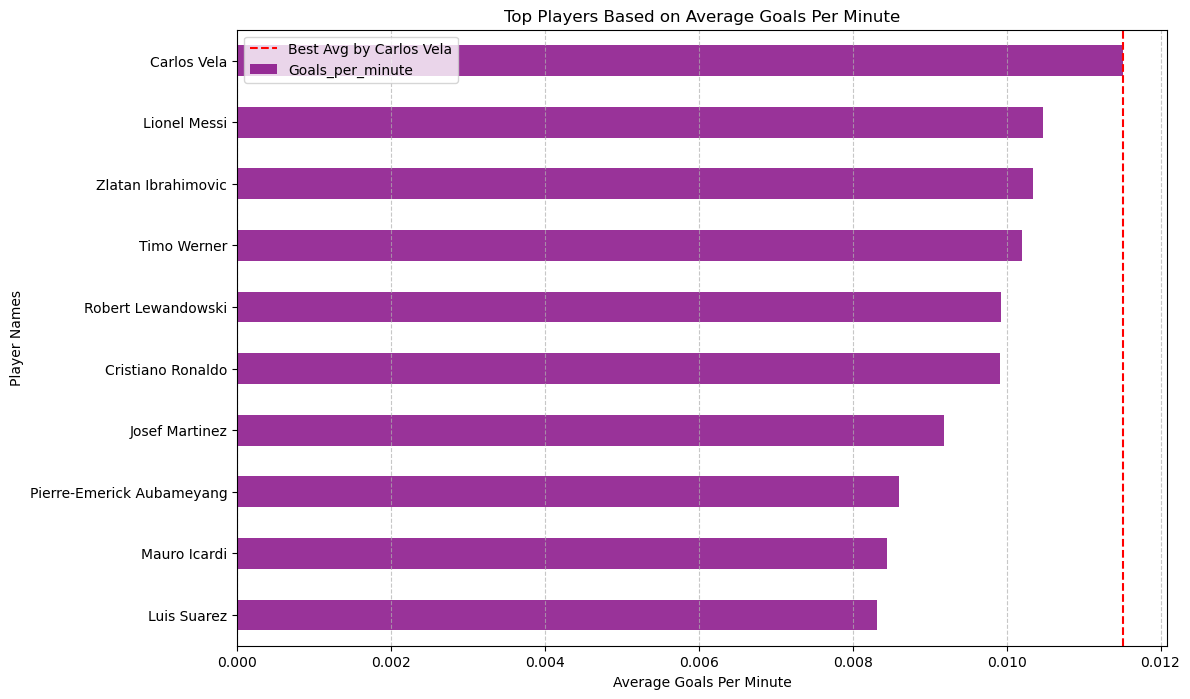

In [57]:
# Plotting the top players based on average goals per minute
top_players = sorted_players.head(10)

plt.figure(figsize=(12, 8))
top_players.plot(kind='barh', color='purple', alpha=0.8)
plt.axvline(best_avg_value, color='red', linestyle='--', label=f"Best Avg by {best_avg_goals_per_minute_player}")
plt.title('Top Players Based on Average Goals Per Minute')
plt.ylabel('Player Names')
plt.xlabel('Average Goals Per Minute')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


#### The bar chart displays the top players based on their average goals per minute. Carlos Vela, highlighted with a red dashed line, stands out as the player with the best average goals per minute among those who played more than 30 games.

# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

##### To determine the player with the least and most number of missed shots:

1. Calculate "Missed Shots" for each player using the formula: Missed Shots=Shots−OnTarget.
2. Identify the player with the least missed shots.
3. Identify the player with the most missed shots.

In [58]:
# Calculate missed shots for each player
df['Missed_Shots'] = df['Shots'] - df['OnTarget']

# Identify player with the least missed shots
player_least_missed = df.loc[df['Missed_Shots'].idxmin()]

# Identify player with the most missed shots
player_most_missed = df.loc[df['Missed_Shots'].idxmax()]

player_least_missed_name = player_least_missed['Player Names']
player_least_missed_value = player_least_missed['Missed_Shots']
player_most_missed_name = player_most_missed['Player Names']
player_most_missed_value = player_most_missed['Missed_Shots']

player_least_missed_name, player_least_missed_value, player_most_missed_name, player_most_missed_value


('Esteban Burgos', 1, 'Cristiano Ronaldo', 129)

#### The player with the least number of missed shots in the dataset is Esteban Burgos with only 1 missed shot. On the other hand, Cristiano Ronaldo has the most number of missed shots, totaling 129.

To visualize this data, I can create a bar chart comparing the missed shots of the player with the least number of missed shots and the player with the most number of missed shots.

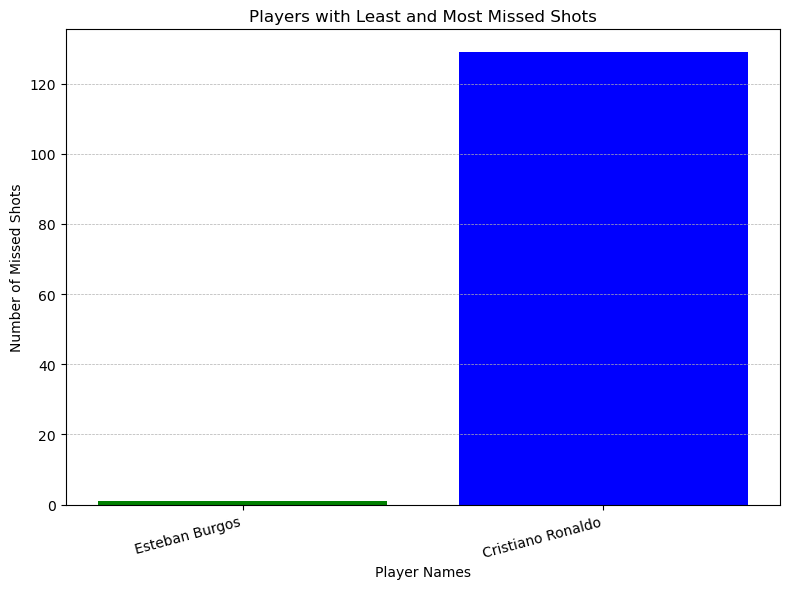

In [59]:
# Data for the bar chart
players = [player_least_missed_name, player_most_missed_name]
missed_shots_values = [player_least_missed_value, player_most_missed_value]
colors = ['green', 'blue']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(players, missed_shots_values, color=colors)

plt.title('Players with Least and Most Missed Shots')
plt.xlabel('Player Names')
plt.ylabel('Number of Missed Shots')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=15, ha="right")


plt.tight_layout()
plt.show()


#### Here's the bar chart comparing the missed shots of the players:

* Esteban Burgos (in green) has the least number of missed shots with only 1.

* Cristiano Ronaldo (in blue) has the most number of missed shots, totaling 129.

# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

#### To determine how many countries have had players who played more than 35 matches and create a bar plot for the counts:

1. Filter the dataset for players who have played more than 35 matches.
2. Group by country and count the number of unique players.
3. Create a bar plot displaying the counts for each country.

In [60]:
# Filter the data for players who have played more than 35 matches
players_over_35_matches = df[df['Matches_Played'] > 35]

# Count the number of unique countries these players belong to
unique_country_counts = players_over_35_matches['Country'].nunique()
unique_country_counts


5

##### There are 5 countries that have had players who played more than 35 matches.

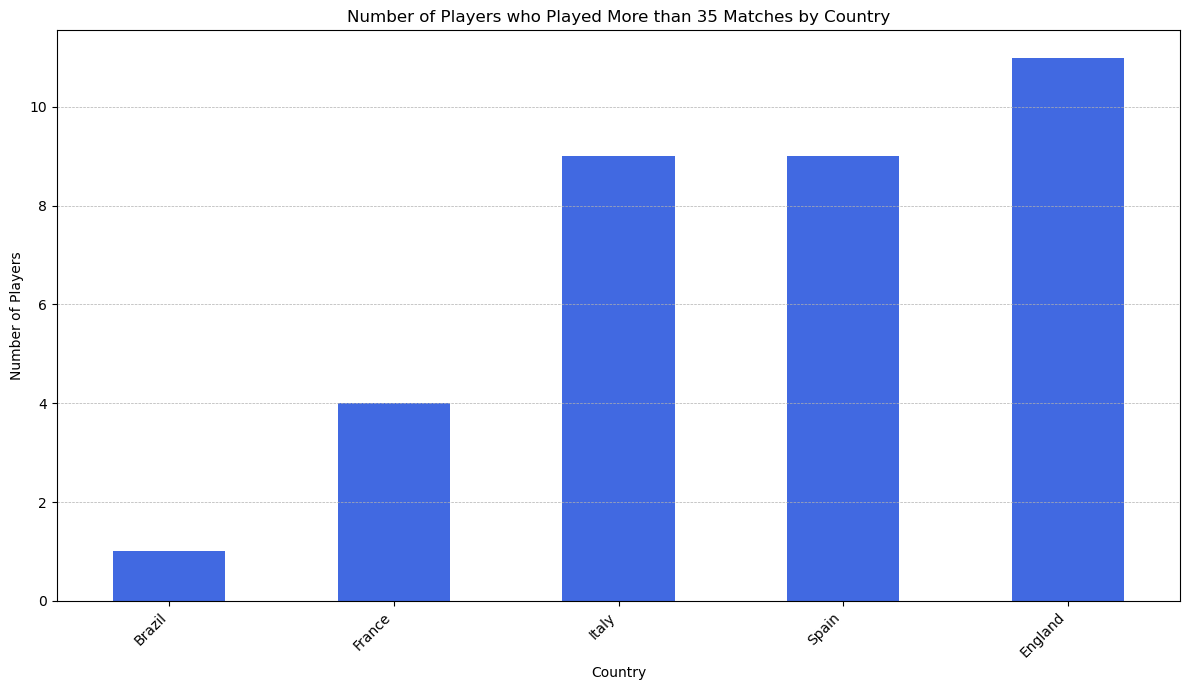

In [61]:
# Filter the data for players who have played more than 35 matches
players_over_35_matches = df[df['Matches_Played'] > 35]

# Group by country and count the number of unique players
country_counts = players_over_35_matches.groupby('Country').size()

# Plotting the counts for each country
plt.figure(figsize=(12, 7))
country_counts.sort_values().plot(kind='bar', color='royalblue')


plt.title('Number of Players who Played More than 35 Matches by Country')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


#### Here's the bar chart displaying the number of players who played more than 35 matches by country. From the chart, you can see the count for each country. Some countries have a higher representation of such players, while others have fewer.

I can create a pie chart to display the distribution of players (who played more than 35 matches) across these countries. 

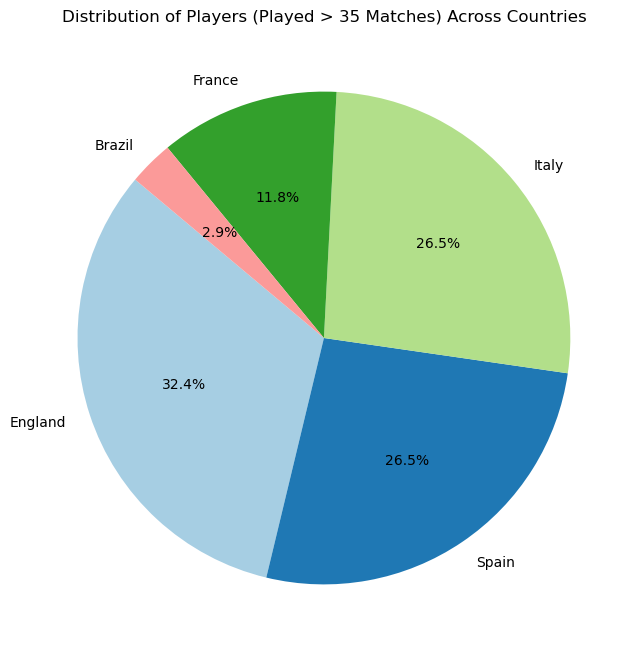

In [62]:
# Count the number of players from each of these countries
country_distribution = players_over_35_matches['Country'].value_counts()

# Plotting the pie chart for the distribution of players across countries
plt.figure(figsize=(10, 8))
plt.pie(country_distribution, labels=country_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Players (Played > 35 Matches) Across Countries')
plt.show()


##### The pie chart depicts the distribution of players (who played more than 35 matches) across various countries. Each segment represents a country, and its size corresponds to the number of players from that country who played over 35 matches. The percentages on each segment provide a clear indication of the proportion of players from each country relative to the total.

# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

#### To create a line chart comparing the top 5 highest-scoring players throughout the years (2016-2020):

1. Group the data by player and sum their goals for each year.
2. Identify the top 5 highest-scoring players based on their total goals from 2016 to 2020.
3. Plot a line chart for these top 5 players to visualize their goal-scoring trend across the years.

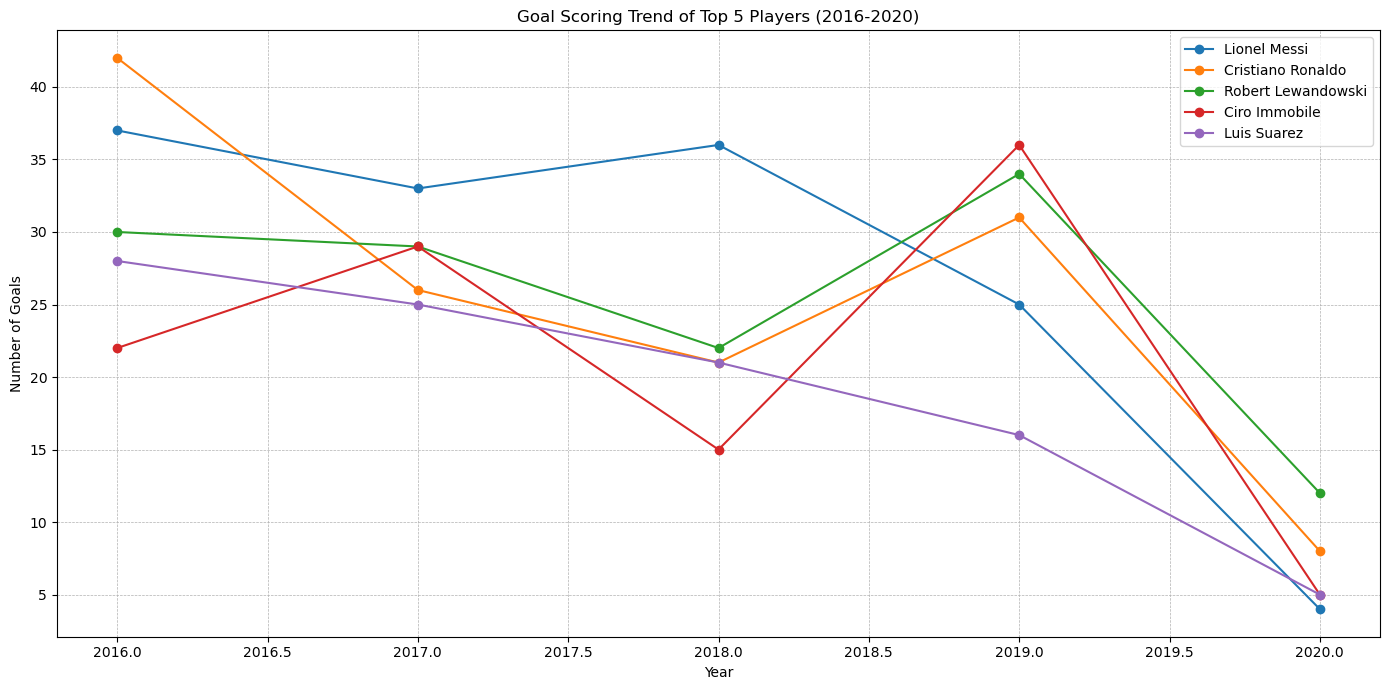

In [63]:
# Group data by player and year, then sum the goals
player_goals_per_year = df.groupby(['Player Names', 'Year'])['Goals'].sum().unstack()

# Identify the top 5 highest-scoring players based on their total goals from 2016 to 2020
top_5_players = player_goals_per_year.sum(axis=1).nlargest(5).index

# Filter the data to keep only the top 5 players
top_5_data = player_goals_per_year.loc[top_5_players]

# Plotting the line chart
plt.figure(figsize=(14, 7))
for player in top_5_data.index:
    plt.plot(top_5_data.columns, top_5_data.loc[player], marker='o', label=player)


plt.title('Goal Scoring Trend of Top 5 Players (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


##### Here's the line chart displaying the goal-scoring trend of the top 5 highest-scoring players from 2016 to 2020. Each line represents the number of goals scored by a player in each year, allowing you to easily compare their performances over the years.

Now, I can create a bar chart that stacks the goals of the top 5 highest-scoring players for each year from 2016 to 2020. This will provide a different perspective on the data, showing the contribution of each player's goals year by year.

<Figure size 1400x800 with 0 Axes>

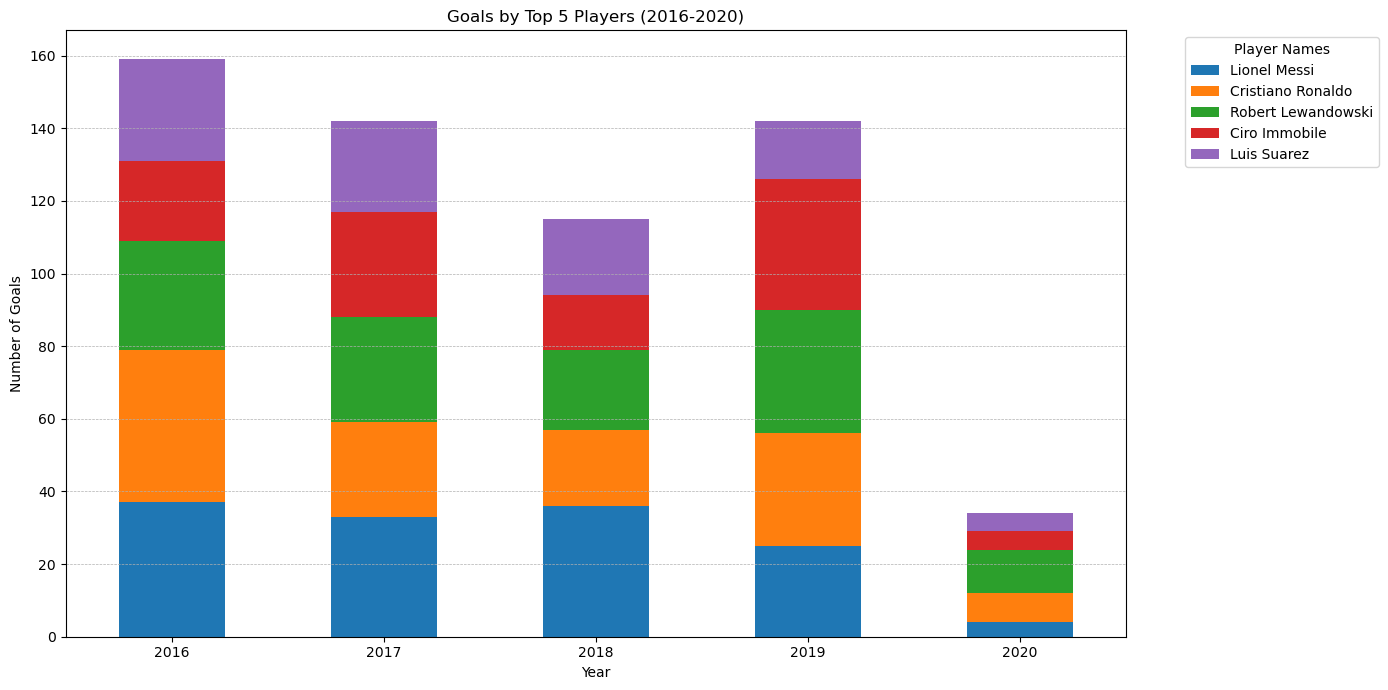

In [64]:
# Plotting a stacked bar chart
plt.figure(figsize=(14, 8))
top_5_data.transpose().plot(kind='bar', stacked=True, figsize=(14, 7))


plt.title('Goals by Top 5 Players (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=0)
plt.legend(title='Player Names', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#### Here's a stacked bar chart displaying the goals scored by the top 5 highest-scoring players from 2016 to 2020. Each segment in the bars represents the number of goals scored by a player in a particular year, to see the distribution of goals among these players across the years.

### Observations:

##### This dataset provides a comprehensive overview of soccer players' performance metrics, including goals scored, shots taken, and matches played.

##### * Player Performance:
Two names consistently stand out in the dataset: Lionel Messi and Cristiano Ronaldo. Their prominence in the football world is mirrored in their statistics. Messi, for example, has an exceptional record even as a substitute, while Ronaldo tops the charts in goals.

##### * Goal Metrics:
The total goals scored across all players in the dataset amount to a significant 7,795, highlighting the collective offensive prowess in the dataset.

##### * Visual Analyses::
The use of varied visualizations, from bar charts to pie charts, enhances the data's comprehensibility. With bar charts offering a clear comparative view of player performances.

The charts and plots reveal trends and outliers, such as the exceptional goal-scoring rates of top players compared to others.

##### * Substitute Impact: 
Substitutions can be game-changers, as highlighted by Lionel Messi's notable performance, scoring the highest goals when brought in as a substitute.